<img src='https://www.ndbc.noaa.gov/images/stations/3mdiscus_scoop.jpg' width="300" align="right">

# National Buoy Data Center (NDBC)

NDBC maintains a large array of wind-wave buoys, https://www.ndbc.noaa.gov/

In this lab we will download some of this data, remove outliers, and relate observed wind speeds with wave heights. We will look at observations at New Dungeness buoy (46088) located in the Strait of Juan de Fuca, https://www.ndbc.noaa.gov/station_page.php?station=46088 (Pictured to the right).

We should note, that NDBC provides a detailed description of measurements that you will need to refer back to for units, https://www.ndbc.noaa.gov/measdes.shtml

Let's use this nice package for importing and downloading NDBC data: https://github.com/GenSci/NDBC



In [3]:
# Let's import our standard packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# Let's use pip to install this NDBC package
!pip install NDBC
from NDBC.NDBC import DataBuoy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  Created wheel for NDBC: filename=NDBC-0.1.1-cp36-none-any.whl size=7749 sha256=74899efe314b4f93fe81a15bfbb031e68cd536f33975597d5a3747e6f7de989c
  Stored in directory: /root/.cache/pip/wheels/22/8f/1e/2b9538833fc91fd91e0e73fc394e775bb82665bba829cafe4e
Successfully built NDBC


In [4]:
# Following the NDBC instructions to grab buoy data from 46088
# Note, if you change our station id you could look at other NDBC buoys
ndbc_id = '46088'
DB = DataBuoy()
DB.set_station_id(ndbc_id) # Hein Bank 
DB.get_station_metadata()
DB.station_info

{'Air temp height': '3.4 m above site elevation',
 'Anemometer height': '3.8 m above site elevation',
 'Barometer elevation': '2.4 m above mean sea level',
 'Sea temp depth': '2 m below water line',
 'Site elevation': 'sea level',
 'Watch circle radius': '152 yards',
 'Water depth': '112.8 m',
 'lat': '48.332 N',
 'lon': '123.179 W'}

In [5]:
# Download the latest month of data
# Here the data and metadata is downloaded into this object called DB
DB.get_stdmet(years=[2011],months=[1,2,3,4,5,6,7,8,9,10,11,12],datetime_index=True)

Jan not available.
Feb not available.
Mar not available.
Apr not available.
May not available.
Jun not available.
Jul not available.
Aug not available.
Sep not available.
Oct not available.
Nov not available.
Dec not available.



Note that the package reports this data is unavailable. However we will see that this is a bug and that it is not the case

In [6]:
# We have to dig around in DB to find the data, DB is an object
print(DB)
print(DB.station_id)

NDBC.DataBuoy Object for Station 46088
46088


In [7]:
# It looks the data piece is a big dicationary
print(DB.data)

{'stdmet': {'meta': {'units': {'YY': '#yr', 'MM': 'mo', 'DD': 'dy', 'hh': 'hr', 'mm': 'mn', 'WDIR': 'degT', 'WSPD': 'm/s', 'GST': 'm/s', 'WVHT': 'm', 'DPD': 'sec', 'APD': 'sec', 'MWD': 'degT', 'PRES': 'hPa', 'ATMP': 'degC', 'WTMP': 'degC', 'DEWP': 'degC', 'VIS': 'mi', 'TIDE': 'ft'}}, 'data':                     WDIR WSPD  GST  WVHT    DPD  ... ATMP WTMP   DEWP   VIS   TIDE
2010-12-31 23:50:00   80  6.4  8.2  0.34   2.60  ...  2.2  7.8  999.0  99.0  99.00
2011-01-01 00:20:00   81  5.6  7.4  0.27   2.60  ...  2.1  7.8  999.0  99.0  99.00
2011-01-01 00:50:00   83  6.5  7.8  0.21  99.00  ...  2.2  7.7  999.0  99.0  99.00
2011-01-01 01:20:00   72  6.0  7.5  0.20  99.00  ...  2.3  7.7  999.0  99.0  99.00
2011-01-01 01:50:00   58  5.7  7.4  0.20  99.00  ...  2.5  7.8  999.0  99.0  99.00
...                  ...  ...  ...   ...    ...  ...  ...  ...    ...   ...    ...
2011-12-31 21:20:00  102  8.1  9.7  0.50  11.43  ...  4.9  7.6  999.0  99.0  99.00
2011-12-31 21:50:00  109  8.7  9.9  0.58  1

In [8]:
# Inside stdmet we see meta info and data
temp = DB.data['stdmet']
print(temp['meta'])
print(temp['data'])

{'units': {'YY': '#yr', 'MM': 'mo', 'DD': 'dy', 'hh': 'hr', 'mm': 'mn', 'WDIR': 'degT', 'WSPD': 'm/s', 'GST': 'm/s', 'WVHT': 'm', 'DPD': 'sec', 'APD': 'sec', 'MWD': 'degT', 'PRES': 'hPa', 'ATMP': 'degC', 'WTMP': 'degC', 'DEWP': 'degC', 'VIS': 'mi', 'TIDE': 'ft'}}
                    WDIR WSPD  GST  WVHT    DPD  ... ATMP WTMP   DEWP   VIS   TIDE
2010-12-31 23:50:00   80  6.4  8.2  0.34   2.60  ...  2.2  7.8  999.0  99.0  99.00
2011-01-01 00:20:00   81  5.6  7.4  0.27   2.60  ...  2.1  7.8  999.0  99.0  99.00
2011-01-01 00:50:00   83  6.5  7.8  0.21  99.00  ...  2.2  7.7  999.0  99.0  99.00
2011-01-01 01:20:00   72  6.0  7.5  0.20  99.00  ...  2.3  7.7  999.0  99.0  99.00
2011-01-01 01:50:00   58  5.7  7.4  0.20  99.00  ...  2.5  7.8  999.0  99.0  99.00
...                  ...  ...  ...   ...    ...  ...  ...  ...    ...   ...    ...
2011-12-31 21:20:00  102  8.1  9.7  0.50  11.43  ...  4.9  7.6  999.0  99.0  99.00
2011-12-31 21:50:00  109  8.7  9.9  0.58  12.12  ...  4.9  7.6  999.0  9

In [9]:
# Here we see that the data is a pandas dataframe, we'll call it df
df = DB.data['stdmet']['data']
df = df.astype(float) # This was critical to do, otherwise we got the error "no numeric data to plot"
df

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
2010-12-31 23:50:00,80.0,6.4,8.2,0.34,2.60,2.58,84.0,1017.7,2.2,7.8,999.0,99.0,99.0
2011-01-01 00:20:00,81.0,5.6,7.4,0.27,2.60,2.56,85.0,1017.5,2.1,7.8,999.0,99.0,99.0
2011-01-01 00:50:00,83.0,6.5,7.8,0.21,99.00,2.50,999.0,1017.6,2.2,7.7,999.0,99.0,99.0
2011-01-01 01:20:00,72.0,6.0,7.5,0.20,99.00,2.52,999.0,1017.6,2.3,7.7,999.0,99.0,99.0
2011-01-01 01:50:00,58.0,5.7,7.4,0.20,99.00,2.64,999.0,1017.4,2.5,7.8,999.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-31 21:20:00,102.0,8.1,9.7,0.50,11.43,3.13,224.0,1027.8,4.9,7.6,999.0,99.0,99.0
2011-12-31 21:50:00,109.0,8.7,9.9,0.58,12.12,3.34,258.0,1027.3,4.9,7.6,999.0,99.0,99.0
2011-12-31 22:20:00,106.0,8.1,9.6,0.73,12.12,3.76,263.0,1027.5,5.1,7.6,999.0,99.0,99.0
2011-12-31 22:50:00,105.0,7.7,9.8,0.69,11.43,3.50,240.0,1027.8,5.2,7.6,999.0,99.0,99.0


Text(0, 0.5, 'SLP [mb]')

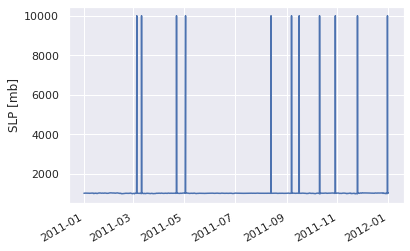

In [10]:
# With pandas we can make quick plots fast, for example Sea-level-pressure (SLP), labeled PRES in our dataset
df['PRES'].plot()
plt.ylabel('SLP [mb]')

### Removing outliers
Commonly real-world data is messy and some "wrangling" is needed. We clearly see that there are some outliers in the dataset that can't be correct. It looks like these values maybe 9999, a commonly used value used to indicate missing data

To remove these we can use tools in the Scipy package

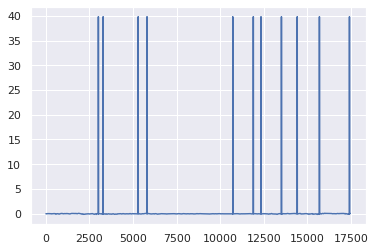

In [11]:
import scipy

# Calculate the zscore: number of standard deviations away each data value is from it's distribution
z_scores = scipy.stats.zscore(df['PRES']) 
plt.plot(z_scores)

In [0]:
# Set all the outliers to nan values (greater than 3 standard deviations)
abs_z_scores = np.abs(z_scores)
bad_values = (abs_z_scores > 3)
df['PRES'][bad_values] = np.nan

Text(0, 0.5, 'SLP [mb]')

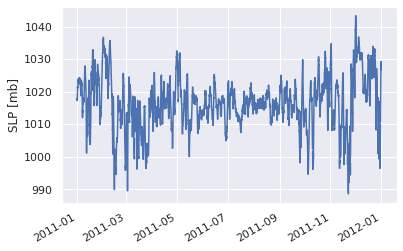

In [13]:
# Now let's check to see if we suceeded
df['PRES'].plot()
plt.ylabel('SLP [mb]')

In [14]:
# We can do this to all the variables of interest with a loop
varlist = ['WDIR','WSPD','GST','WVHT','DPD','APD','MWD','PRES','ATMP','WTMP']
for myvar in varlist:
  z_scores = scipy.stats.zscore(df[myvar])
  abs_z_scores = np.abs(z_scores)
  bad_values = (abs_z_scores > 3)
  df[myvar][bad_values] = np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


Text(0, 0.5, 'Wind Dir [deg]')

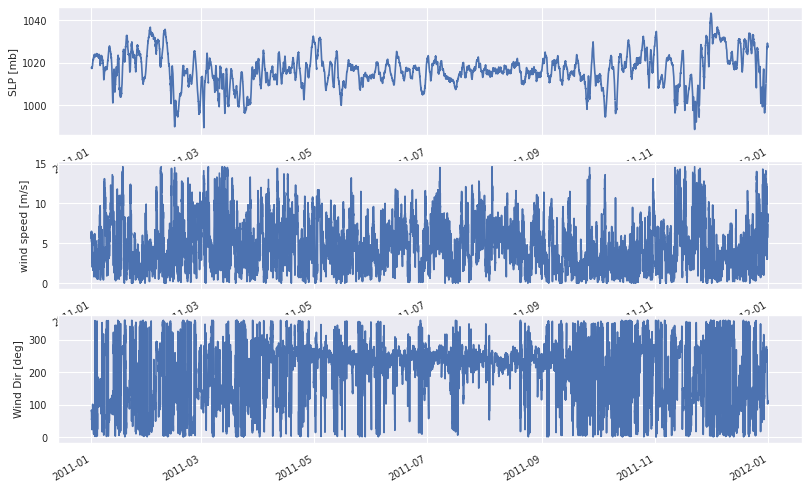

In [15]:
# We can plot multiple panels at once, and excersice some control over our figures
sns.set(font_scale=0.8) # Changes font scaling 

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(3,1,1) # (rows, columns, plot your plotting)
df['PRES'].plot()
plt.ylabel('SLP [mb]')
plt.subplot(3,1,2)
df['WSPD'].plot()
plt.ylabel('wind speed [m/s]')
plt.subplot(3,1,3)
df['WDIR'].plot()
plt.ylabel('Wind Dir [deg]')

Text(0, 0.5, 'Wind Dir [deg]')

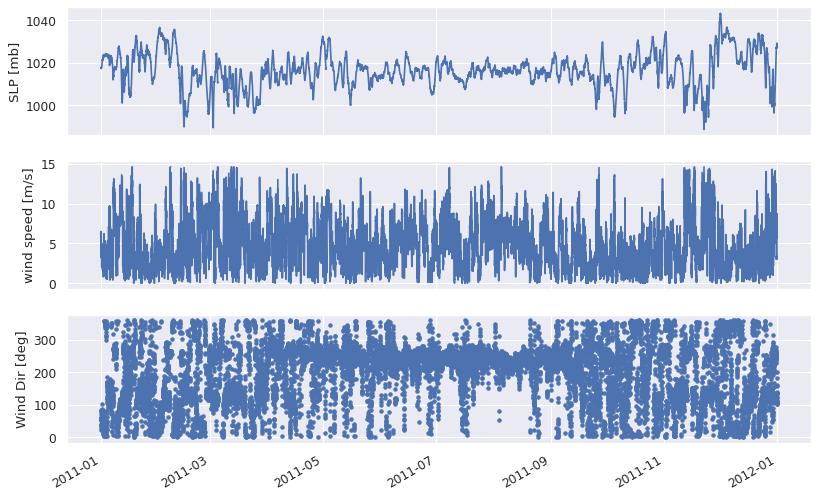

In [16]:
# We can also use subplots in more specific ways, for example specifying a shared axis
# We can also specify the line and marker types
sns.set(font_scale=1) # Changes font scaling 

f = plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
(ax1, ax2, ax3) = f.subplots(3, 1, sharex=True)

plt.sca(ax1)
df['PRES'].plot()
plt.ylabel('SLP [mb]')

plt.sca(ax2)
df['WSPD'].plot()
plt.ylabel('wind speed [m/s]')

plt.sca(ax3)
df['WDIR'].plot(marker='.',linestyle='none')
plt.ylabel('Wind Dir [deg]')

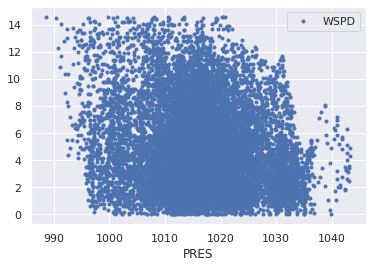

In [17]:
# We can also plot variables agains eachother to explore relations
# Do you see a correlation between winds and pressure? why might this be so?
df.plot(x='PRES',y='WSPD',marker='.',linestyle='none')

Text(0, 0.5, 'Wind Speed [mb]')

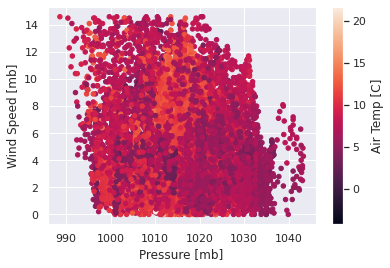

In [18]:
# We had been using our pandas data frame for plotting, but we can use a bit more control using matplotlib
plt.scatter(x=df['PRES'], y=df['WSPD'], c=df['ATMP'], s=20)
cb = plt.colorbar()
cb.set_label('Air Temp [C]')
plt.xlabel('Pressure [mb]')
plt.ylabel('Wind Speed [mb]')

Text(0, 0.5, 'Wave Period [sec]')

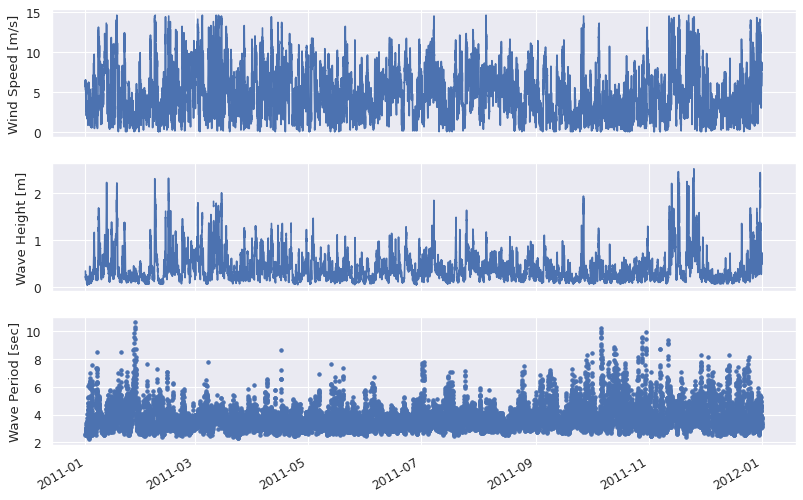

In [19]:
# let's look at winds and wave heights
sns.set(font_scale=1) # Changes font scaling (helps to beautify the plot)

f = plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
(ax1, ax2, ax3) = f.subplots(3, 1, sharex=True)

plt.sca(ax1)
df['WSPD'].plot()
plt.ylabel('Wind Speed [m/s]')

plt.sca(ax2)
df['WVHT'].plot()
plt.ylabel('Wave Height [m]')

plt.sca(ax3)
df['APD'].plot(marker='.',linestyle='none')
plt.ylabel('Wave Period [sec]')

## Activity Part 1 - Instructions
1. Use plt.figure to make a 12 x 8 in figure
2. Generate a scatter plot of wave heights (WVHT) and wind speeds (WSPD)
3. Color the dots by wave period (APD). 
4. Connect to your google drive and save the plot

Note: Remember to label your axes! Including your colorbar

Text(0, 0.5, 'Wave Height [m]')

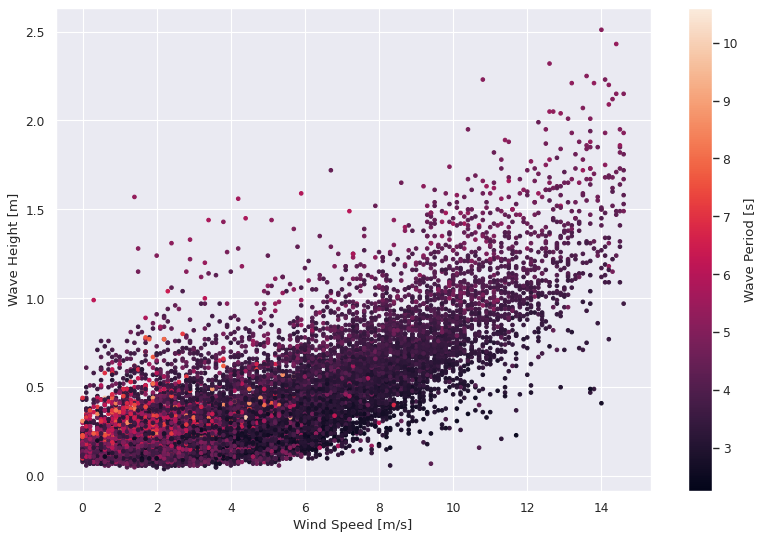

In [20]:
# Part 1 - Solution 
f = plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x=df['WSPD'], y=df['WVHT'], c=df['APD'], s=10)
cb = plt.colorbar()
cb.set_label('Wave Period [s]')
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('Wave Height [m]')

## Activity Part 2 - Instructions
1. Use np.polyfit() to perform linear and quadratic fits between wave height and wind speed
2. Plot fits and data on the same plot, what fit do you prefer? Are wave heights and wind related linearly or are wave heights proportional to the square of wind?

In [0]:
# Create linear and quadratic fits
x = df['WSPD']
y = df['WVHT']
idx = np.isfinite(x) & np.isfinite(y)
myfit = np.polyfit(x[idx],y[idx],deg=1)
myfit2 = np.polyfit(x[idx],y[idx],deg=2)

In [0]:
# Create curves from both fits
xf = np.arange(0,20,0.1)
yf1 = myfit[1]+myfit[0]*xf
yf2 = myfit2[2]+myfit2[1]*xf+myfit2[0]*np.square(xf)

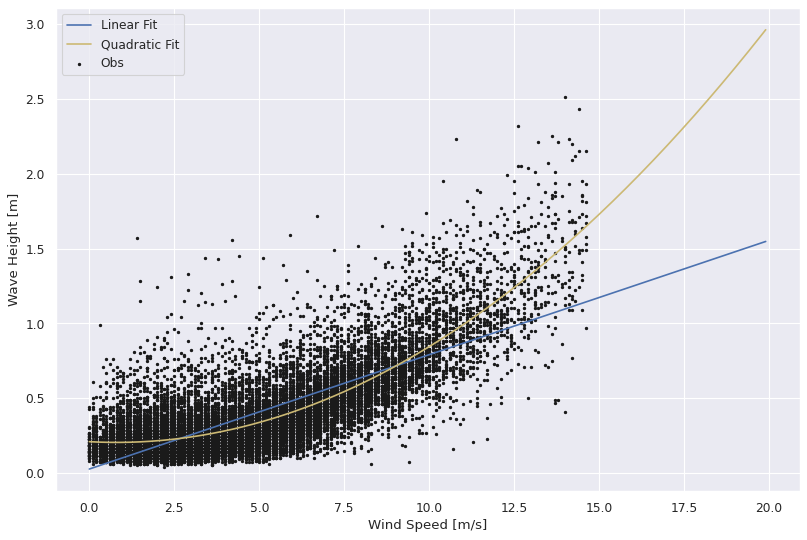

In [23]:
# Plot data and fits
f = plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x=df['WSPD'], y=df['WVHT'], s=4,label='Obs',c='k')
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('Wave Height [m]')
plt.plot(xf,yf1,color='b',label='Linear Fit')
plt.plot(xf,yf2,color='y',label='Quadratic Fit')
plt.legend()